
## Jim Simons Trading Secrets 1.2 SIMULATED Data Generation
https://www.youtube.com/watch?v=K10PVDm0LVw

### Algorithmic Trading Strategy [Mean Reversion] in Python using Bollinger Bands/RSI !BEGINNER FRIENDLY
https://www.youtube.com/watch?v=AXc1YAsCduI
### Backtesting OVER 500 stocks using VECTORIZATION [Do NOT skip this]
https://www.youtube.com/watch?v=FScM38mvZ5s&t=141s

In [2]:
import pandas as pd

In [3]:
import yfinance as yf
data= yf.download('^NSEI',group_by='Ticker',start="2008-01-01" ,end=None)
data = data.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
data
data['sma_1']=data['Close'].rolling(window=50).mean()
data['sma_2']=data['Close'].rolling(window=100).mean()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data['price']= data['Open'].shift(-1)
data[:10]

Price,Ticker,Close,High,Low,Open,Volume,sma_1,sma_2,price
Date,,,,,,,,,
2008-01-01,^NSEI,6144.350098,6165.350098,6109.850098,6136.750000,0,NaN,NaN,6144.700195
2008-01-02,^NSEI,6179.399902,6197.000000,6060.850098,6144.700195,0,NaN,NaN,6184.250000
2008-01-03,^NSEI,6178.549805,6230.149902,6126.399902,6184.250000,0,NaN,NaN,6179.100098
2008-01-04,^NSEI,6274.299805,6300.049805,6179.100098,6179.100098,0,NaN,NaN,6271.000000
2008-01-07,^NSEI,6279.100098,6289.799805,6193.350098,6271.000000,0,NaN,NaN,6282.450195
2008-01-08,^NSEI,6287.850098,6357.100098,6221.600098,6282.450195,0,NaN,NaN,6287.549805
2008-01-09,^NSEI,6272.000000,6338.299805,6231.250000,6287.549805,0,NaN,NaN,6278.100098
2008-01-10,^NSEI,6156.950195,6347.000000,6142.899902,6278.100098,0,NaN,NaN,6166.649902
2008-01-11,^NSEI,6200.100098,6224.200195,6112.549805,6166.649902,0,NaN,NaN,6208.799805


In [30]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['sma_1'], name='fast', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data['sma_2'], name='slow', line=dict(color='black')))

### Developing the vectorized method for identifying when we get the first true signals

In [31]:
## Buy signal is when condition fulfilled---sma fast > sma slow
(data.sma_1>data.sma_2)
(data.sma_1>data.sma_2)[-65:]

Date
2024-12-11    False
2024-12-12    False
2024-12-13    False
2024-12-16    False
2024-12-17    False
              ...  
2025-03-07    False
2025-03-10    False
2025-03-11    False
2025-03-12    False
2025-03-13    False
Length: 65, dtype: bool

In [32]:
#first true signal
(data.sma_1>data.sma_2).idxmax()

Timestamp('2009-04-13 00:00:00')

In [33]:
first_buy = pd.Series(data.index==(data.sma_1>data.sma_2).idxmax(),index=data.index )
first_buy[:75]

Date
2008-01-01    False
2008-01-02    False
2008-01-03    False
2008-01-04    False
2008-01-07    False
              ...  
2008-04-11    False
2008-04-15    False
2008-04-16    False
2008-04-17    False
2008-04-21    False
Length: 75, dtype: bool

## How to find all the signals

In [34]:
x_= pd.Series([False,False,True,True,False,False])
x_

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [35]:
x_.diff()

0      NaN
1    False
2     True
3    False
4     True
5    False
dtype: object

# Real SIgnal

In [36]:
real_signal = first_buy | (data.sma_1>data.sma_2).diff()
real_signal[-65:]


Date
2024-12-11    False
2024-12-12    False
2024-12-13    False
2024-12-16    False
2024-12-17    False
              ...  
2025-03-07    False
2025-03-10    False
2025-03-11    False
2025-03-12    False
2025-03-13    False
Length: 65, dtype: bool

In [37]:
trades= data[real_signal]
trades

Price,Ticker,Close,High,Low,Open,Volume,sma_1,sma_2,price
Date,,,,,,,,,
2009-04-13,^NSEI,3382.600098,3417.800049,3334.149902,3342.199951,0,2864.081987,2859.167488,3381.449951
2010-03-25,^NSEI,5260.399902,5267.299805,5202.950195,5225.299805,0,5026.947998,5029.476001,5260.549805
2010-04-22,^NSEI,5269.350098,5331.799805,5221.100098,5248.600098,0,5109.618008,5103.330010,5269.649902
2010-07-06,^NSEI,5289.049805,5297.450195,5231.500000,5236.100098,0,5140.089990,5141.486006,5293.100098
2010-07-28,^NSEI,5397.549805,5447.850098,5386.250000,5436.100098,0,5219.435010,5217.435010,5397.850098
2011-01-20,^NSEI,5711.600098,5729.450195,5634.500000,5656.000000,0,5937.392998,5950.004995,5692.049805
2011-05-19,^NSEI,5428.100098,5452.600098,5411.250000,5448.149902,0,5643.569004,5642.138003,5450.649902
2011-06-28,^NSEI,5545.299805,5558.299805,5496.350098,5548.850098,0,5534.725996,5539.683999,5566.500000
2012-02-23,^NSEI,5483.299805,5537.399902,5460.799805,5490.049805,0,5026.376992,5019.882002,5479.149902


## MTM postion
## when to do this ---if the length of trade is not divisble by 2


In [38]:
if len(trades)%2!=0:
    mtm = data.tail(1).copy()
    mtm.price = mtm.Close
    trades =pd.concat([trades,mtm])
trades

Price,Ticker,Close,High,Low,Open,Volume,sma_1,sma_2,price
Date,,,,,,,,,
2009-04-13,^NSEI,3382.600098,3417.800049,3334.149902,3342.199951,0,2864.081987,2859.167488,3381.449951
2010-03-25,^NSEI,5260.399902,5267.299805,5202.950195,5225.299805,0,5026.947998,5029.476001,5260.549805
2010-04-22,^NSEI,5269.350098,5331.799805,5221.100098,5248.600098,0,5109.618008,5103.330010,5269.649902
2010-07-06,^NSEI,5289.049805,5297.450195,5231.500000,5236.100098,0,5140.089990,5141.486006,5293.100098
2010-07-28,^NSEI,5397.549805,5447.850098,5386.250000,5436.100098,0,5219.435010,5217.435010,5397.850098
2011-01-20,^NSEI,5711.600098,5729.450195,5634.500000,5656.000000,0,5937.392998,5950.004995,5692.049805
2011-05-19,^NSEI,5428.100098,5452.600098,5411.250000,5448.149902,0,5643.569004,5642.138003,5450.649902
2011-06-28,^NSEI,5545.299805,5558.299805,5496.350098,5548.850098,0,5534.725996,5539.683999,5566.500000
2012-02-23,^NSEI,5483.299805,5537.399902,5460.799805,5490.049805,0,5026.376992,5019.882002,5479.149902


### Find profit

In [39]:
#Every second row difference will be the profit
trades.price.diff()[1::2]

Date
2010-03-25    1879.099854
2010-07-06      23.450195
2011-01-20     294.199707
2011-06-28     115.850098
2012-05-28    -473.799805
2013-04-04     222.850098
2013-08-07    -199.300293
2015-05-15    2054.150391
2015-09-14    -638.499512
2016-11-24     276.950195
2018-04-11    1479.050781
2018-10-31    -280.899414
2019-08-09     437.150391
2020-03-11   -1864.250000
2022-01-06    7046.750000
2023-02-22     159.701172
2023-12-04    2214.701172
2024-11-28    2976.400391
Name: price, dtype: float64

In [41]:
trades.price[0::2].values

array([ 3381.44995117,  5269.64990234,  5397.85009766,  5450.64990234,
        5479.14990234,  5345.25      ,  5709.35009766,  6230.79980469,
        8505.84960938,  7731.        ,  8931.59960938, 10722.59960938,
       10702.25      , 11904.20019531, 10750.84960938, 17414.94921875,
       18594.19921875, 20950.75      ])

In [88]:
# Relative Profit
trades.price.diff()[1::2] / trades.price[0::2].values

Datetime
2023-01-25 11:15:00+05:30    0.001611
2023-02-14 09:15:00+05:30    0.007585
2023-02-20 15:15:00+05:30   -0.002110
2023-03-10 13:15:00+05:30   -0.010346
2023-03-27 09:15:00+05:30   -0.007758
2023-04-18 11:15:00+05:30    0.023810
2023-05-17 11:15:00+05:30    0.020129
2023-06-12 10:15:00+05:30    0.010539
2023-06-23 12:15:00+05:30   -0.001229
2023-07-25 09:15:00+05:30    0.038737
2023-07-27 13:15:00+05:30   -0.003817
2023-08-02 11:15:00+05:30   -0.011447
2023-08-09 09:15:00+05:30   -0.004629
2023-08-11 12:15:00+05:30   -0.004115
2023-08-25 12:15:00+05:30   -0.007227
2023-08-31 13:15:00+05:30   -0.006815
2023-09-20 14:15:00+05:30    0.022416
2023-10-18 15:15:00+05:30   -0.004546
2023-12-13 13:15:00+05:30    0.086131
2023-12-21 14:15:00+05:30    0.004965
2024-01-03 12:15:00+05:30    0.005378
2024-01-08 12:15:00+05:30   -0.002864
2024-01-17 15:15:00+05:30   -0.018948
2024-02-09 09:15:00+05:30   -0.003003
2024-02-28 12:15:00+05:30    0.006164
2024-03-12 15:15:00+05:30    0.000316
202

In [42]:
profits = trades.price.diff()[1::2] / trades.price[0::2].values
gain = (profits + 1).prod()
gain

4.188842328854934

## PLOTLY CHARTS

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=data.index, y=data['sma_1'], name='fast', line=dict(color='red')))
fig.add_trace(go.Scatter(x=data.index, y=data['sma_2'], name='slow', line=dict(color='black')))
fig.add_trace(go.Scatter(x=trades.index[0::2], y=trades.price[0::2], name='buySignal',mode='markers' ,marker=dict(color='green',size=8))) 
fig.add_trace(go.Scatter(x=trades.index[1::2], y=trades.price[1::2], name='sellSignal',mode='markers' ,marker=dict(color='red',size=6))) 
# fig.add_trace(go.Scatter(x=df.iloc[si].Date, y=df.iloc[si].Close, name='sellSignal',mode='markers' ,marker=dict(color='red',size=8)))
fig.update_xaxes(type='category')
fig.update_layout(height=800)

## Creating the vectorized function

In [18]:
#For adding the sma1 and sma2
def ma_calc(data,n,m):
    data['sma_1'] = data['Close'].rolling(window=n).mean()
    data['sma_2'] = data['Close'].rolling(window=m).mean()
    data['price'] = data['Close'].shift(-1)
    
    return data

In [17]:
def vectorized(df,n,m):
    ma_calc(df,n,m)
    first_buy = pd.Series(df.index == (df.sma_1>df.sma_2).idxmax(),index=df.index)
    real_signal = first_buy | (df.sma_1>df.sma_2).diff()
    trades = df[real_signal]
    if len(trades)%2!=0:
        mtm = data.tail(1).copy()
        mtm.price = mtm.Close
        trades =pd.concat([trades,mtm])
    profits = trades.price.diff()[1::2] / trades.price[0::2].values
    gain = (profits + 1).prod()
    return gain    


## BAcktesting over 500 Stock-
https://www.youtube.com/watch?v=fN4LWwYZZcw

In [3]:
import pickle
import yfinance as yf
import pandas as pd
with open(r"D:\Archives\backtest_ursell\Load_Nifty_data\nifty50tickers.pickle",'rb') as f:
    tickers=pickle.load(f)

In [4]:
# https://en.wikipedia.org/wiki/NIFTY_50
# https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
# tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol
# tickers = tickers.to_list()
tickers

['ADANIENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BPCL',
 'BHARTIARTL',
 'BRITANNIA',
 'CIPLA',
 'COALINDIA',
 'DIVISLAB',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'LTIM',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SHRIRAMFIN',
 'SBIN',
 'SUNPHARMA',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'ULTRACEMCO',
 'WIPRO']

In [5]:
yf_tickers=[]
for ticker in tickers:
    ticker = ticker+".NS"
    yf_tickers.append(ticker)
yf_tickers

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'ITC.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LTIM.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NESTLEIND.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [12]:
price_df = yf.download(yf_tickers,start="2009-01-01" ,end=None)   
price_df

[*********************100%***********************]  50 of 50 completed


Price             Close                                            \
Ticker      ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS   
Date                                                                
2009-01-02    19.912062     60.439644    220.704544     78.100250   
2009-01-05    21.905153     71.232109    215.491226     79.207916   
2009-01-06    22.423038     72.107910    213.424255     79.467545   
2009-01-07    21.572451     64.234802    210.323807     77.208908   
2009-01-09    19.767683     61.671238    200.930725     76.183441   
...                 ...           ...           ...           ...   
2025-03-07  2247.500000   1144.500000   6216.100098   2270.000000   
2025-03-10  2228.300049   1142.900024   6149.600098   2278.600098   
2025-03-11  2250.600098   1135.000000   6134.799805   2287.399902   
2025-03-12  2241.800049   1128.300049   6143.750000   2251.300049   
2025-03-13  2221.100098   1119.199951   6105.649902   2231.300049   

Price                                                              \
Ticker      AXISBANK.NS BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS   
Date                                                                
2009-01-02    97.175270    139.212708     15.228211      5.694390   
2009-01-05   100.438950    147.365234     15.989623      5.869738   
2009-01-06   102.169426    145.540543     16.789587      6.010016   
2009-01-07    93.624672    136.350113     16.987169      5.549729   
2009-01-09    87.258698    143.196884     17.420883      5.457673   
...                 ...           ...           ...           ...   
2025-03-07  1037.650024   7574.750000   1845.300049   8404.500000   
2025-03-10  1035.849976   7383.399902   1840.349976   8342.599609   
2025-03-11  1025.650024   7499.950195   1805.400024   8340.450195   
2025-03-12  1011.200012   7515.049805   1819.449951   8484.450195   
2025-03-13  1010.200012   7504.700195   1807.449951   8420.450195   

Price                                 ...        Volume               \
Ticker     BHARTIARTL.NS     BPCL.NS  ... SHRIRAMFIN.NS SUNPHARMA.NS   
Date                                  ...                              
2009-01-02    294.428436   14.674044  ...      727087.0    6949430.0   
2009-01-05    286.387939   14.492456  ...     3849738.0    2735660.0   
2009-01-06    274.421204   15.069491  ...     2648634.0    3522170.0   
2009-01-07    271.497345   14.843519  ...      208779.0    2639340.0   
2009-01-09    266.861084   15.360027  ...     3662347.0    6706500.0   
...                  ...         ...  ...           ...          ...   
2025-03-07   1630.699951  261.260010  ...     5829062.0     980890.0   
2025-03-10   1630.949951  256.929993  ...     4906168.0    1600589.0   
2025-03-11   1662.949951  264.579987  ...     6734891.0    3325416.0   
2025-03-12   1642.849976  266.320007  ...     5378060.0    2389362.0   
2025-03-13   1632.500000  264.410004  ...     5273706.0    1666929.0   

Price                                                                       \
Ticker     TATACONSUM.NS TATAMOTORS.NS TATASTEEL.NS      TCS.NS   TECHM.NS   
Date                                                                         
2009-01-02      969510.0    18566132.0   55795156.0   5375740.0   557116.0   
2009-01-05      400100.0    13382037.0   79015833.0   4829776.0   758484.0   
2009-01-06      395230.0    18622646.0   78569351.0   5918992.0  4686052.0   
2009-01-07      462960.0     8271220.0  105218373.0   9013828.0  1703880.0   
2009-01-09      209380.0    11836652.0   88071820.0  14219980.0   678680.0   
...                  ...           ...          ...         ...        ...   
2025-03-07      945675.0    10123450.0   81821791.0   2051315.0   893696.0   
2025-03-10     1660207.0    10309166.0   54450331.0   1004626.0   798491.0   
2025-03-11     2748541.0     9534750.0   35916900.0   1995450.0  1769157.0   
2025-03-12     1619168.0    18732785.0   26377549.0   3174167.0  2665932.0   
2025-03-13      907521.0    14004345.0   48

In [13]:
price_df.columns

MultiIndex([( 'Close',   'ADANIENT.NS'),
            ( 'Close', 'ADANIPORTS.NS'),
            ( 'Close', 'APOLLOHOSP.NS'),
            ( 'Close', 'ASIANPAINT.NS'),
            ( 'Close',   'AXISBANK.NS'),
            ( 'Close', 'BAJAJ-AUTO.NS'),
            ( 'Close', 'BAJAJFINSV.NS'),
            ( 'Close', 'BAJFINANCE.NS'),
            ( 'Close', 'BHARTIARTL.NS'),
            ( 'Close',       'BPCL.NS'),
            ...
            ('Volume', 'SHRIRAMFIN.NS'),
            ('Volume',  'SUNPHARMA.NS'),
            ('Volume', 'TATACONSUM.NS'),
            ('Volume', 'TATAMOTORS.NS'),
            ('Volume',  'TATASTEEL.NS'),
            ('Volume',        'TCS.NS'),
            ('Volume',      'TECHM.NS'),
            ('Volume',      'TITAN.NS'),
            ('Volume', 'ULTRACEMCO.NS'),
            ('Volume',      'WIPRO.NS')],
           names=['Price', 'Ticker'], length=250)

In [14]:
#Set up function for slicing the df for a given symbol

price_df[price_df.columns[price_df.columns.get_level_values(1)=='TCS']]

Date
2009-01-02
2009-01-05
2009-01-06
2009-01-07
2009-01-09
...
2025-03-07
2025-03-10
2025-03-11
2025-03-12


In [15]:
def slice_df(symbol):
    sliced = price_df.copy()
    sliced = price_df[price_df.columns[price_df.columns.get_level_values(1)==symbol]]
    sliced.columns = sliced.columns.droplevel(1)
    return sliced


In [19]:
results=[]
for sym in yf_tickers:
    subdf = slice_df(sym)
    print('result for' + sym)
    print(vectorized(subdf,50,100))
    results.append(vectorized(subdf,50,100))

result forADANIENT.NS
12.186614037181632
result forADANIPORTS.NS
4.00729054119198
result forAPOLLOHOSP.NS
8.167948398989177
result forASIANPAINT.NS
3.87304471184621


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

result forAXISBANK.NS
5.184740565995697
result forBAJAJ-AUTO.NS


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

5.657607961555841
result forBAJFINANCE.NS
42.43114358016342
result forBAJAJFINSV.NS
5.163037686819367
result forBPCL.NS
3.8019723014967766


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

result forBHARTIARTL.NS
2.4132035637926603
result forBRITANNIA.NS
16.215622026165345
result forCIPLA.NS
2.9436901486886606
result forCOALINDIA.NS
2.141367666837447
result forDIVISLAB.NS


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

8.775400821602224
result forDRREDDY.NS
4.207002583997902
result forEICHERMOT.NS
28.464567553997984
result forGRASIM.NS
3.6076868013652774
result forHCLTECH.NS
14.72460002795911
result forHDFCBANK.NS
4.037535368585135
result forHDFCLIFE.NS
0.8114945615500005
result forHEROMOTOCO.NS
1.6757824528014895
result forHINDALCO.NS
3.665190366438409
result forHINDUNILVR.NS
3.847258216257788


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

result forICICIBANK.NS
4.657497326067017
result forINDUSINDBK.NS
3.7764354855320224
result forINFY.NS
2.622310329274636
result forITC.NS
4.225775560111254
result forJSWSTEEL.NS
4.771604999506656


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

result forKOTAKBANK.NS
2.03459147676007
result forLT.NS
3.2604055925578326
result forLTIM.NS
4.863537870033816
result forM&M.NS
7.700744923317504
result forMARUTI.NS
2.3781409393156046
result forNESTLEIND.NS
3.2071914837187245
result forNTPC.NS
1.1955958398586493
result forONGC.NS
3.772268905179321
result forPOWERGRID.NS
5.301732840198852
result forRELIANCE.NS


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

1.2023225450536779
result forSBILIFE.NS
1.3434618132915623
result forSHRIRAMFIN.NS
4.242359240952882
result forSBIN.NS
1.7184479513312185
result forSUNPHARMA.NS
3.8992394557565317


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

result forTATAMOTORS.NS
3.303223179045635
result forTATASTEEL.NS
6.114904883241076
result forTCS.NS
7.174695507656988
result forTATACONSUM.NS
4.037989546650894
result forTECHM.NS


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_1'] = data['Close'].rolling(window=n).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

5.046426297954819
result forTITAN.NS
6.36879873653312
result forULTRACEMCO.NS
2.2345385868402516
result forWIPRO.NS
5.1802174849128875


C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sma_2'] = data['Close'].rolling(window=m).mean()
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['Close'].shift(-1)
C:\Users\arunj\AppData\Local\Temp\ipykernel_106460\2472257263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [20]:
profits = pd.DataFrame({'profits':results},index=yf_tickers)
profits

,profits
ADANIENT.NS,12.186614
ADANIPORTS.NS,4.007291
APOLLOHOSP.NS,8.167948
ASIANPAINT.NS,3.873045
AXISBANK.NS,5.184741
BAJAJ-AUTO.NS,5.657608
BAJFINANCE.NS,42.431144
BAJAJFINSV.NS,5.163038
BPCL.NS,3.801972
BHARTIARTL.NS,2.413204


In [21]:
profits.nlargest(10,'profits')

,profits
BAJFINANCE.NS,42.431144
EICHERMOT.NS,28.464568
BRITANNIA.NS,16.215622
HCLTECH.NS,14.724600
ADANIENT.NS,12.186614
DIVISLAB.NS,8.775401
APOLLOHOSP.NS,8.167948
M&M.NS,7.700745
TCS.NS,7.174696
TITAN.NS,6.368799


In [99]:
data_hist = yf.download("^NSEI",start="2010-01-01" )
data_hist

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0
...,...,...,...,...,...,...
2024-12-24,23769.099609,23867.650391,23685.150391,23727.650391,23727.650391,177700
2024-12-26,23775.800781,23854.500000,23653.599609,23750.199219,23750.199219,177700
2024-12-27,23801.400391,23938.849609,23800.599609,23813.400391,23813.400391,176800


In [104]:
vectorized(data_hist,50,100)

(                    Open          High           Low         Close  \
 Date                                                                 
 2010-05-31   5076.100098   5097.600098   5038.549805   5086.299805   
 2010-07-06   5236.100098   5297.450195   5231.500000   5289.049805   
 2010-07-28   5436.100098   5447.850098   5386.250000   5397.549805   
 2011-01-20   5656.000000   5729.450195   5634.500000   5711.600098   
 2011-05-19   5448.149902   5452.600098   5411.250000   5428.100098   
 2011-06-28   5548.850098   5558.299805   5496.350098   5545.299805   
 2012-02-23   5490.049805   5537.399902   5460.799805   5483.299805   
 2012-05-28   4931.700195   4994.950195   4931.299805   4985.649902   
 2012-08-07   5295.399902   5350.100098   5281.649902   5336.700195   
 2013-04-04   5640.649902   5644.450195   5565.649902   5574.750000   
 2013-06-12   5771.750000   5792.899902   5738.600098   5760.200195   
 2013-08-07   5549.299805   5561.450195   5486.850098   5519.100098   
 2013-

## Financial Modeling Prep | *GO-TO* Financial data API python for 2025 
https://www.youtube.com/watch?v=4mrGGb7j_14


In [5]:
import requests
import pandas as pd
base_url = "https://financialmodelingprep.com/api"
data_type = 'balance-sheet-statement'
ticker = 'AAPL'
API_KEY = "McDpzT2kj3MM46DIky6QwMu7sQM3CyfG"
url = f'{base_url}/v3/{data_type}/{ticker}?apikey={API_KEY}'
response = requests.get(url)
data = response.json()


In [9]:
df = pd.DataFrame(data)
df

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,totalStockholdersEquity,totalEquity,totalLiabilitiesAndStockholdersEquity,minorityInterest,totalLiabilitiesAndTotalEquity,totalInvestments,totalDebt,netDebt,link,finalLink
0,2024-09-28,AAPL,USD,0000320193,2024-11-01,2024-11-01 06:01:36,2024,FY,29943000000,35228000000,...,56950000000,56950000000,364980000000,0,364980000000,126707000000,106629000000,76686000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2023-09-30,AAPL,USD,0000320193,2023-11-03,2023-11-02 18:08:27,2023,FY,29965000000,31590000000,...,62146000000,62146000000,352583000000,0,352583000000,132134000000,111088000000,81123000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2022-09-24,AAPL,USD,0000320193,2022-10-28,2022-10-27 18:01:14,2022,FY,23646000000,24658000000,...,50672000000,50672000000,352755000000,0,352755000000,145463000000,132480000000,108834000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2021-09-25,AAPL,USD,0000320193,2021-10-29,2021-10-28 18:04:28,2021,FY,34940000000,27699000000,...,63090000000,63090000000,351002000000,0,351002000000,155576000000,136522000000,101582000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2020-09-26,AAPL,USD,0000320193,2020-10-30,2020-10-29 18:06:25,2020,FY,38016000000,52927000000,...,65339000000,65339000000,323888000000,0,323888000000,153814000000,122278000000,84262000000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


### FREE SERVICES
https://site.financialmodelingprep.com/developer/docs/dashboard
#### login thru shuniya account

In [10]:
data_type = ["income-statement","balance-sheet-statement","cash-flow-statement","income-statement-growth","discounted-cash-flow","historical-chart/1min"]
base_url = "https://financialmodelingprep.com/api"
data_type = 'discounted-cash-flow'
ticker = 'AAPL'
API_KEY = "McDpzT2kj3MM46DIky6QwMu7sQM3CyfG"
url = f'{base_url}/v3/{data_type}/{ticker}?apikey={API_KEY}'
response = requests.get(url)
data = response.json()

In [11]:
data

[{'symbol': 'AAPL',
  'date': '2024-12-29',
  'dcf': 144.29326723120275,
  'Stock Price': 255.59}]

## Exploring the permutation - https://www.youtube.com/watch?v=NLBXgSmRBgU

In [60]:
df = yf.download('ITC.NS',group_by="Ticker",start="2010-01-01", end=None)
df = df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
df.index = df.index.astype('datetime64[s]')
df1 = yf.download('RELIANCE.NS',group_by="Ticker",start="2010-01-01", end=None)
df1 = df1.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
df1.index = df1.index.astype('datetime64[s]')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


Mean. REAL:       0.001096 PERM:       0.001096
Stdd. REAL:       0.016853 PERM:       0.016503
Skew. REAL:       0.223651 PERM:      -0.031696
Kurt. REAL:       2.760285 PERM:       1.649277


[*********************100%***********************]  1 of 1 completed


BTC&ETH Correlation REAL: 0.191 PERM: 0.207


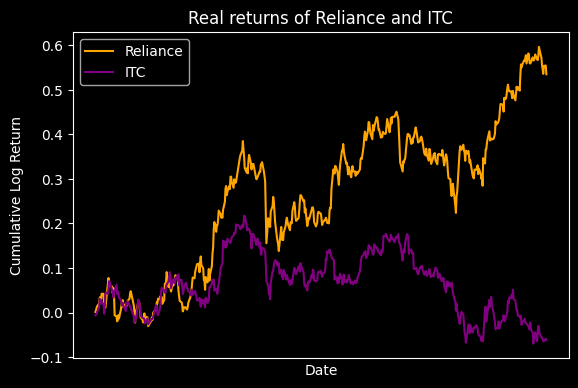

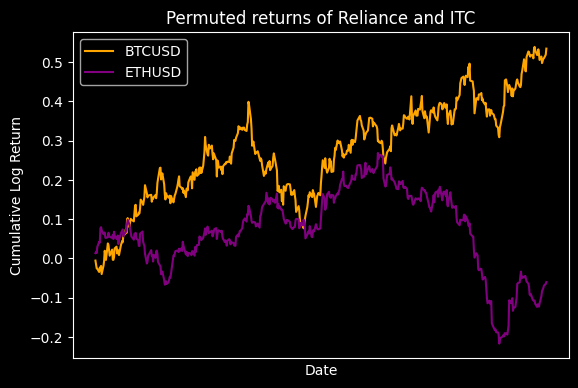

In [67]:
from typing import List, Union
import numpy as np

def get_permutation(
    ohlc: Union[pd.DataFrame, List[pd.DataFrame]], start_index: int = 0, seed=None
):
    assert start_index >= 0
    np.random.seed(seed)
    # n_markets = len(ohlc)
    # print(n_markets)
    # n_bars = len(ohlc[1])
    # print(n_bars)


    if isinstance(ohlc, list):
        time_index = ohlc[0].index
        for mkt in ohlc:
            assert np.all(time_index == mkt.index), "Indexes do not match"
        n_markets = len(ohlc)
        
    else:
        n_markets = 1
        time_index = ohlc.index
        ohlc = [ohlc]

    n_bars = len(ohlc[0])
    perm_index = start_index + 1
    perm_n = n_bars - perm_index

    start_bar = np.empty((n_markets, 4))
    relative_open = np.empty((n_markets, perm_n))
    relative_high = np.empty((n_markets, perm_n))
    relative_low = np.empty((n_markets, perm_n))
    relative_close = np.empty((n_markets, perm_n))

    for mkt_i, reg_bars in enumerate(ohlc):
        log_bars = np.log(reg_bars[['Open', 'High', 'Low', 'Close']])

        # Get start bar
        start_bar[mkt_i] = log_bars.iloc[start_index].to_numpy()

        # Open relative to last close
        r_o = (log_bars['Open'] - log_bars['Close'].shift()).to_numpy()
        
        # Get prices relative to this bars open
        r_h = (log_bars['High'] - log_bars['Open']).to_numpy()
        r_l = (log_bars['Low'] - log_bars['Open']).to_numpy()
        r_c = (log_bars['Close'] - log_bars['Open']).to_numpy()

        relative_open[mkt_i] = r_o[perm_index:]
        relative_high[mkt_i] = r_h[perm_index:]
        relative_low[mkt_i] = r_l[perm_index:]
        relative_close[mkt_i] = r_c[perm_index:]

    idx = np.arange(perm_n)

    # Shuffle intrabar relative values (high/low/close)
    perm1 = np.random.permutation(idx)
    relative_high = relative_high[:, perm1]
    relative_low = relative_low[:, perm1]
    relative_close = relative_close[:, perm1]

    # Shuffle last close to open (gaps) seprately
    perm2 = np.random.permutation(idx)
    relative_open = relative_open[:, perm2]

    # Create permutation from relative prices
    perm_ohlc = []
    for mkt_i, reg_bars in enumerate(ohlc):
        perm_bars = np.zeros((n_bars, 4))

        # Copy over real data before start index 
        log_bars = np.log(reg_bars[['Open', 'High', 'Low', 'Close']]).to_numpy().copy()
        perm_bars[:start_index] = log_bars[:start_index]
        
        # Copy start bar
        perm_bars[start_index] = start_bar[mkt_i]

        for i in range(perm_index, n_bars):
            k = i - perm_index
            perm_bars[i, 0] = perm_bars[i - 1, 3] + relative_open[mkt_i][k]
            perm_bars[i, 1] = perm_bars[i, 0] + relative_high[mkt_i][k]
            perm_bars[i, 2] = perm_bars[i, 0] + relative_low[mkt_i][k]
            perm_bars[i, 3] = perm_bars[i, 0] + relative_close[mkt_i][k]

        perm_bars = np.exp(perm_bars)
        perm_bars = pd.DataFrame(perm_bars, index=time_index, columns=['Open', 'High', 'Low', 'Close'])

        perm_ohlc.append(perm_bars)

    if n_markets > 1:
        return perm_ohlc
    else:
        return perm_ohlc[0]

if __name__ == '__main__':
    
    import matplotlib.pyplot as plt
    
    df1 = yf.download('RELIANCE.NS',group_by="Ticker",start="2010-01-01", end=None)
    df1 = df1.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
    df1.index = df1.index.astype('datetime64[s]')
    btc_real = df1[(df1.index.year >= 2018) & (df1.index.year < 2020)]

    btc_perm = get_permutation(btc_real)

    btc_real_r = np.log(btc_real['Close']).diff() 
    btc_perm_r = np.log(btc_perm['Close']).diff()

    print(f"Mean. REAL: {btc_real_r.mean():14.6f} PERM: {btc_perm_r.mean():14.6f}")
    print(f"Stdd. REAL: {btc_real_r.std():14.6f} PERM: {btc_perm_r.std():14.6f}")
    print(f"Skew. REAL: {btc_real_r.skew():14.6f} PERM: {btc_perm_r.skew():14.6f}")
    print(f"Kurt. REAL: {btc_real_r.kurt():14.6f} PERM: {btc_perm_r.kurt():14.6f}")

    df = yf.download('ITC.NS',group_by="Ticker",start="2010-01-01", end=None)
    df = df.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)
    df.index = df.index.astype('datetime64[s]')
    eth_real = df[(df.index.year >= 2018) & (df.index.year < 2020)]
    eth_real_r = np.log(eth_real['Close']).diff()
    
    print("") 

    permed = get_permutation([btc_real, eth_real])
    btc_perm = permed[0]
    eth_perm = permed[1]
    
    btc_perm_r = np.log(btc_perm['Close']).diff()
    eth_perm_r = np.log(eth_perm['Close']).diff()
    print(f"BTC&ETH Correlation REAL: {btc_real_r.corr(eth_real_r):5.3f} PERM: {btc_perm_r.corr(eth_perm_r):5.3f}")

    plt.style.use("dark_background")    
    np.log(btc_real['Close']).diff().cumsum().plot(color='orange', label='Reliance')
    np.log(eth_real['Close']).diff().cumsum().plot(color='purple', label='ITC')
    
    plt.ylabel("Cumulative Log Return")
    plt.title("Real returns of Reliance and ITC")
    plt.legend()
    plt.show()

    np.log(btc_perm['Close']).diff().cumsum().plot(color='orange', label='BTCUSD')
    np.log(eth_perm['Close']).diff().cumsum().plot(color='purple', label='ETHUSD')
    plt.title("Permuted returns of Reliance and ITC")
    plt.ylabel("Cumulative Log Return")
    plt.legend()
    plt.show()

# get_permutation([df,df1],0)